# Jupyter Data Science Workflow
## From exploratory analaysis to reproducible science



In [1]:
from urllib.request import urlretrieve
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%matplotlib inline


In [2]:
URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

def get_fremont_data(filename="fremont.csv", url=URL, force_download=False):
    """
      Download and cache the fremont data
      
    Parameters
    ----------
    filename: string (optional)
        location to save the data.
    url: string(optional)
        web location of the data
    force_download: bool (optional)
        if True, force redownload of data.
        
    Returns
    -------
    data: pandas.DataFrame
        The fremont bridge data.
    """
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv("fremont.csv", index_col="Date")
    try:
        data.index = pd.to_datetime(data.index, format="%m/%d/%Y %H:%M:%S %p")
    except TypeError:
        data.index = pd.to_datetime()
    data.columns = ["Total", "East", "West"] # change the column names
    return data


In [3]:
# Load the data
data = get_fremont_data()
data.head()

,Total,East,West
Date,,,
2012-10-03 12:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


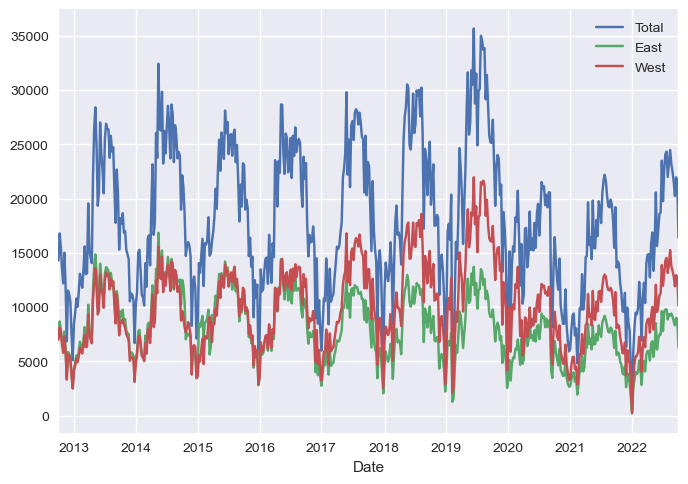

In [4]:
data.resample("W").sum().plot();

(0.0, 1256022.05)

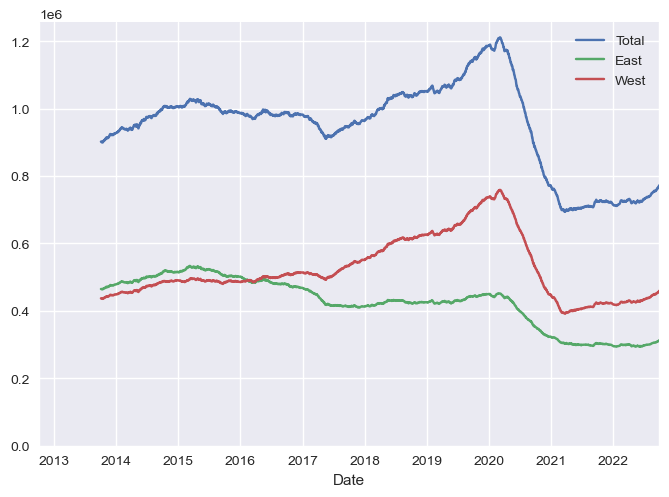

In [5]:
ax = data.resample("D").sum().rolling(365).sum().plot()
ax.set_ylim(0, None)


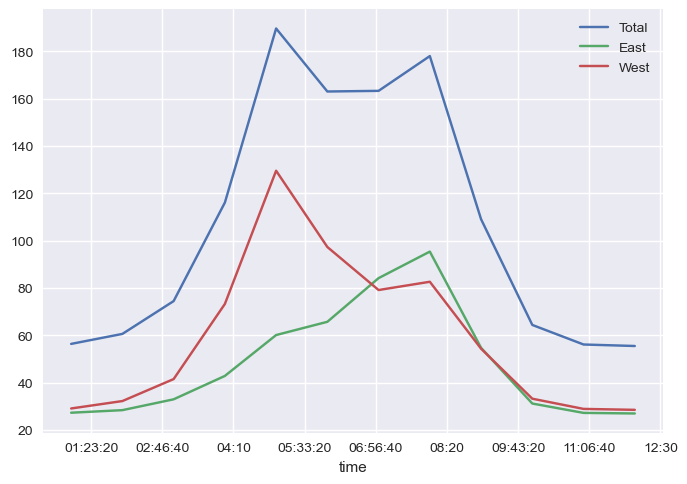

In [6]:
data.groupby(data.index.time).mean().plot()
plt.show()

In [57]:
pivoted = data.pivot_table("Total", index=data.index.time, columns=data.index.date)

<AxesSubplot:xlabel='time'>

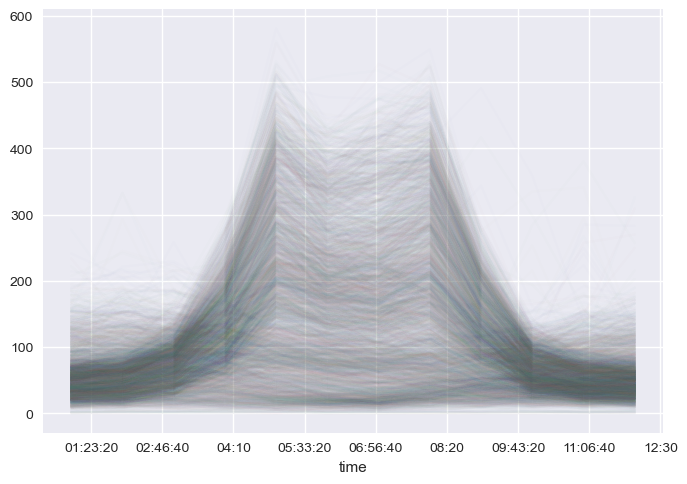

In [8]:
pivoted.plot(legend=False, alpha=0.01)

In [9]:
print(f"The shape of the pivoted data is giving as\
 {pivoted.shape[0]} hours by {pivoted.shape[1]} days")

The shape of the pivoted data is giving as 12 hours by 3650 days


In [10]:
X = pivoted.T.values
X.shape

(3650, 12)

In [73]:
from sklearn.decomposition import PCA
X2 = PCA(2, svd_solver="full").fit_transform(X)

In [74]:
X2.shape

(3650, 2)

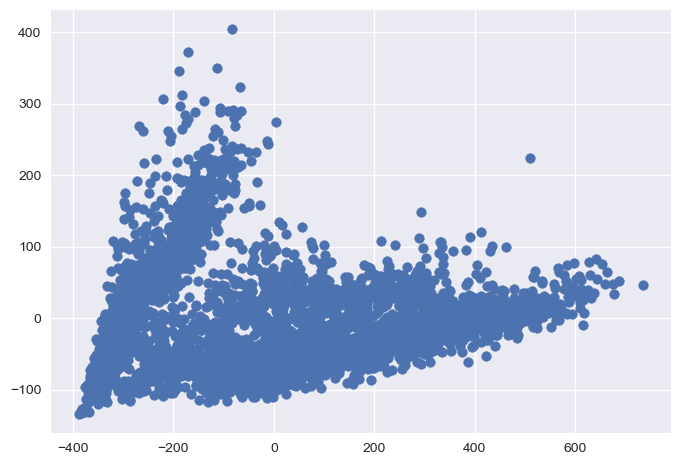

In [75]:
plt.scatter(X2[:,0], X2[:,1])

In [76]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)

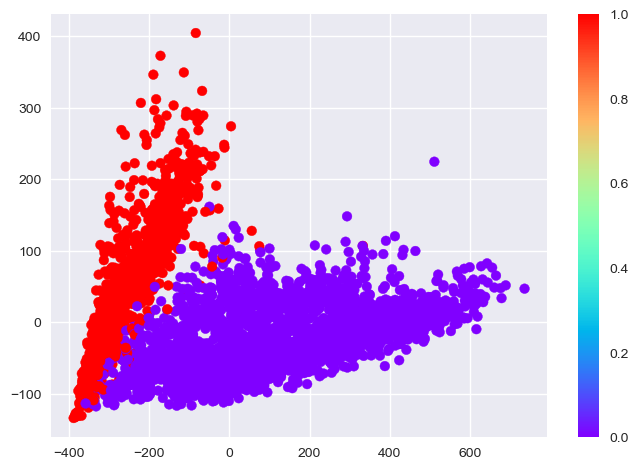

In [77]:
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap="rainbow")
plt.colorbar()

<AxesSubplot:xlabel='time'>

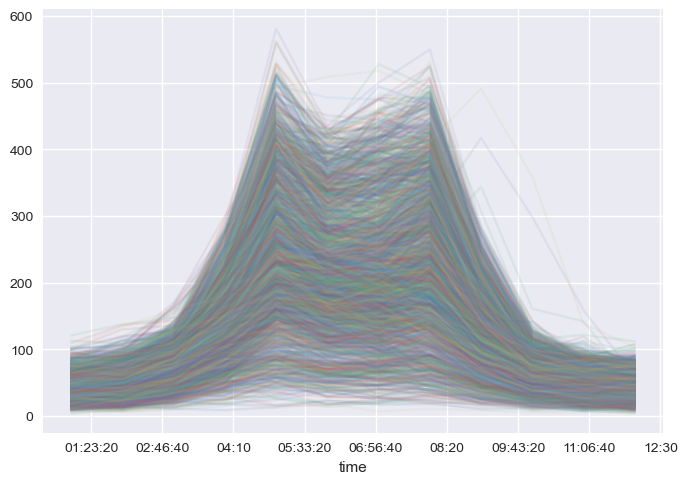

In [78]:
# Examine what is going on in each clusters
pivoted.T[labels==0].T.plot(legend=False, alpha=0.1)

In [79]:
dayofweek=pd.DatetimeIndex(pivoted.columns).dayofweek

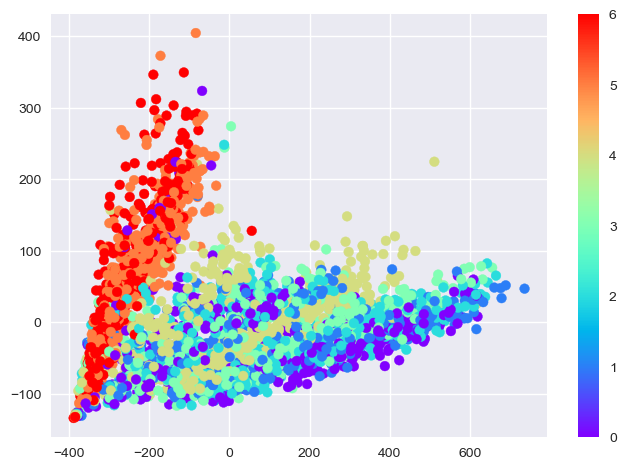

In [80]:
plt.scatter(X2[:,0], X2[:, 1], c=dayofweek, cmap="rainbow")
plt.colorbar()


In [81]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-25', '2013-01-01',
               '2013-05-27', '2013-07-04', '2013-07-05', '2013-09-02',
               '2013-11-28', '2013-11-29',
               ...
               '2021-12-31', '2022-01-04', '2022-01-14', '2022-01-17',
               '2022-02-21', '2022-04-29', '2022-05-30', '2022-06-10',
               '2022-07-04', '2022-09-05'],
              dtype='datetime64[ns]', length=136, freq=None)